<a href="https://colab.research.google.com/github/joedetDS/tourist_demand/blob/main/td_akwaibom_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, Layer
import tensorflow.keras.backend as K
import tensorflow as tf

In [2]:
# Load the uploaded dataset to analyze its structure
file_path = '/content/Tourism_Demand_Akwa_Ibom.csv'
tourism_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
tourism_data.head()

,Date,Humidity,Events,Weather,Rainfall,Tourism_Demand
0,2004-01,85.44,Ibaka,Sunny,12.33,2220
1,2004-02,92.83,Ibaka,Stormy,130.78,1895
2,2004-03,93.95,Ibaka,Cloudy,188.48,1525
3,2004-04,78.40,Ibeno Beach,Sunny,44.66,1735
4,2004-05,66.56,Ibaka,Stormy,70.52,1408


In [3]:
tourism_data

,Date,Humidity,Events,Weather,Rainfall,Tourism_Demand
0,2004-01,85.44,Ibaka,Sunny,12.33,2220
1,2004-02,92.83,Ibaka,Stormy,130.78,1895
2,2004-03,93.95,Ibaka,Cloudy,188.48,1525
3,2004-04,78.40,Ibeno Beach,Sunny,44.66,1735
4,2004-05,66.56,Ibaka,Stormy,70.52,1408
...,...,...,...,...,...,...
9995,2016-12,78.10,Ibom Food Fest,Sunny,33.30,2176
9996,2017-01,79.87,Ibeno Beach,Cloudy,71.74,1976
9997,2017-02,77.39,Ibeno Beach,Cloudy,246.77,1987
9998,2017-03,84.05,Local Sports Event,Sunny,19.27,1722


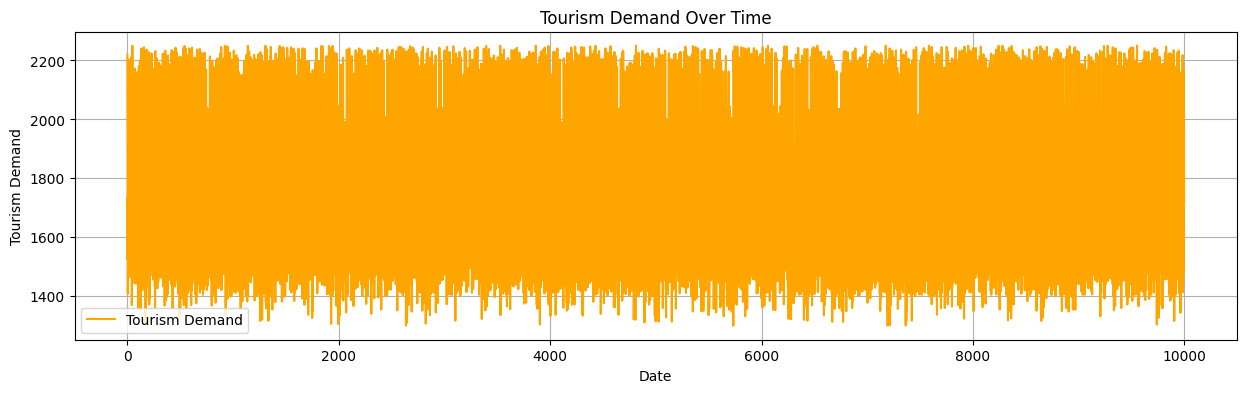

In [4]:
plt.figure(figsize=(15, 4))
plt.plot(tourism_data.index, tourism_data['Tourism_Demand'], label='Tourism Demand', color='orange')
plt.title('Tourism Demand Over Time')
plt.ylabel('Tourism Demand')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show()

In [5]:
# Convert 'Date' to datetime
tourism_data['Date'] = pd.to_datetime(tourism_data['Date'])

# Extract year and month for further analysis
tourism_data['Year'] = tourism_data['Date'].dt.year
tourism_data['Month'] = tourism_data['Date'].dt.month

# Set Date as the index for time-series plots
tourism_data.set_index('Date', inplace=True)

In [6]:
avg_demand_per_year = tourism_data.groupby('Year')['Tourism_Demand'].mean()
avg_demand_per_year.head(5)

,Tourism_Demand
Year,
2004,1701.089286
2005,1708.888889
2006,1711.013889
2007,1709.736111
2008,1712.960317


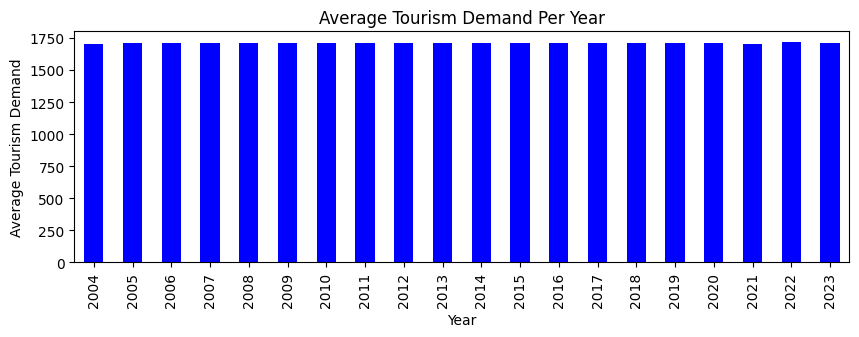

In [7]:
avg_demand_per_year = tourism_data.groupby('Year')['Tourism_Demand'].mean()
plt.figure(figsize=(10, 3))
avg_demand_per_year.plot(kind='bar', color='blue')
plt.title('Average Tourism Demand Per Year')
plt.ylabel('Average Tourism Demand')
plt.xlabel('Year')
plt.show()

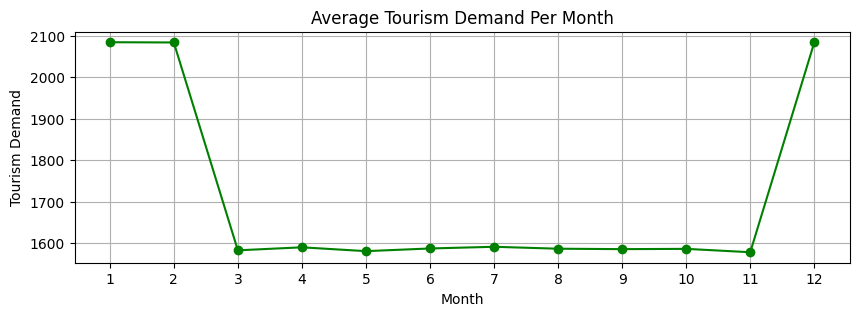

In [8]:
avg_demand_per_month = tourism_data.groupby('Month')['Tourism_Demand'].mean()
plt.figure(figsize=(10, 3))
avg_demand_per_month.plot(kind='line', marker='o', color='green')
plt.title('Average Tourism Demand Per Month')
plt.ylabel('Tourism Demand')
plt.xlabel('Month')
plt.xticks(range(1, 13))
plt.grid()
plt.show()

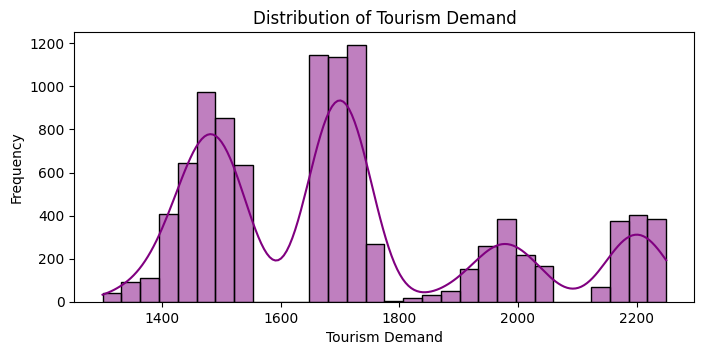

In [9]:
plt.figure(figsize=(8, 3.5))
sns.histplot(tourism_data['Tourism_Demand'], kde=True, bins=30, color='purple')
plt.title('Distribution of Tourism Demand')
plt.xlabel('Tourism Demand')
plt.ylabel('Frequency')
plt.show()

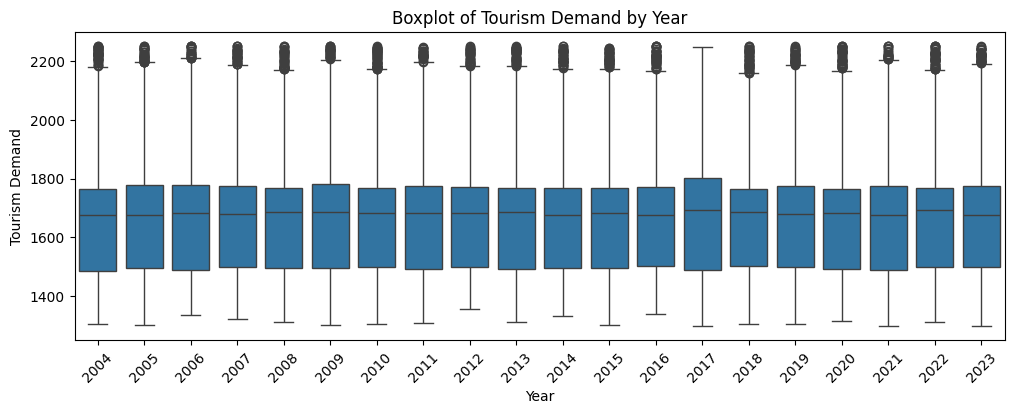

In [10]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Year', y='Tourism_Demand', data=tourism_data)
plt.title('Boxplot of Tourism Demand by Year')
plt.ylabel('Tourism Demand')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

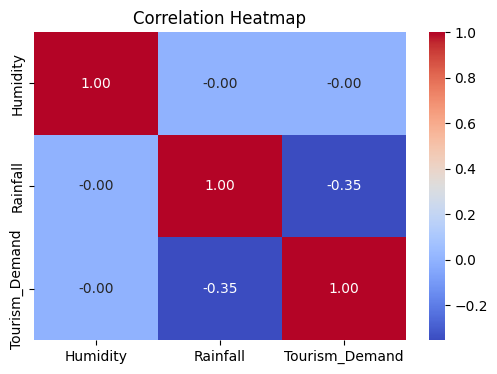

In [11]:
plt.figure(figsize=(6, 4))
sns.heatmap(tourism_data[['Humidity', 'Rainfall','Tourism_Demand']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

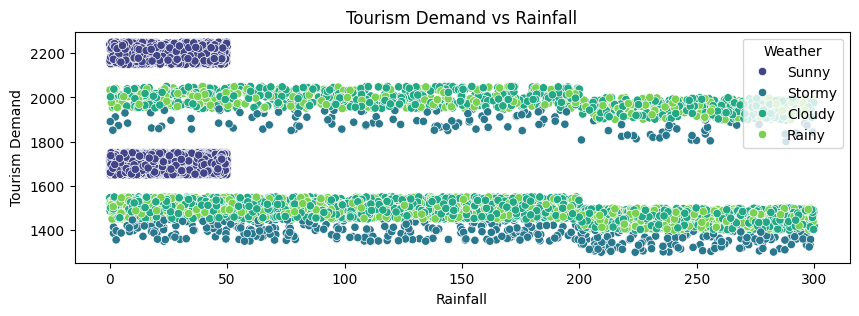

In [12]:
plt.figure(figsize=(10, 3))
sns.scatterplot(x='Rainfall', y='Tourism_Demand', data=tourism_data, hue='Weather', palette='viridis')
plt.title('Tourism Demand vs Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Tourism Demand')
plt.show()

In [13]:
tourism_data

,Humidity,Events,Weather,Rainfall,Tourism_Demand,Year,Month
Date,,,,,,,
2004-01-01,85.44,Ibaka,Sunny,12.33,2220,2004,1
2004-02-01,92.83,Ibaka,Stormy,130.78,1895,2004,2
2004-03-01,93.95,Ibaka,Cloudy,188.48,1525,2004,3
2004-04-01,78.40,Ibeno Beach,Sunny,44.66,1735,2004,4
2004-05-01,66.56,Ibaka,Stormy,70.52,1408,2004,5
...,...,...,...,...,...,...,...
2016-12-01,78.10,Ibom Food Fest,Sunny,33.30,2176,2016,12
2017-01-01,79.87,Ibeno Beach,Cloudy,71.74,1976,2017,1
2017-02-01,77.39,Ibeno Beach,Cloudy,246.77,1987,2017,2


In [14]:
# Reset the index and restore 'Date' as a column
tourism_data.reset_index(inplace=True)

# Display the first few rows to confirm changes
tourism_data.head()


,Date,Humidity,Events,Weather,Rainfall,Tourism_Demand,Year,Month
0,2004-01-01,85.44,Ibaka,Sunny,12.33,2220,2004,1
1,2004-02-01,92.83,Ibaka,Stormy,130.78,1895,2004,2
2,2004-03-01,93.95,Ibaka,Cloudy,188.48,1525,2004,3
3,2004-04-01,78.40,Ibeno Beach,Sunny,44.66,1735,2004,4
4,2004-05-01,66.56,Ibaka,Stormy,70.52,1408,2004,5


In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

# Convert Date column to datetime and sort by date
tourism_data['Date'] = pd.to_datetime(tourism_data['Date'])
tourism_data = tourism_data.sort_values('Date')

# Ordinal encode categorical columns (Events, Weather)
ordinal_encoder = OrdinalEncoder()
tourism_data[['Events', 'Weather']] = ordinal_encoder.fit_transform(tourism_data[['Events', 'Weather']])

# Select relevant columns and normalize numerical features
features = ['Humidity', 'Rainfall', 'Events', 'Weather']
target = 'Tourism_Demand'

In [16]:
# Retrieve the mapping for each encoded column
for col, categories in zip(['Events', 'Weather'], ordinal_encoder.categories_):
    print(f"{col}:")
    for index, category in enumerate(categories):
        print(f"  {index} -> {category}")


Events:
  0 -> 9999 Carol Night
  1 -> Ekpo Display
  2 -> Ibaka
  3 -> Ibeno Beach
  4 -> Ibom Food Fest
  5 -> Local Sports Event
Weather:
  0 -> Cloudy
  1 -> Rainy
  2 -> Stormy
  3 -> Sunny


In [17]:
# Normalize features and target
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

tourism_data[features] = scaler_features.fit_transform(tourism_data[features])
tourism_data[target] = scaler_target.fit_transform(tourism_data[[target]])

In [18]:
# Prepare data for time series modeling
def create_time_series_data(data, time_steps=12):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, :-1])
        y.append(data[i + time_steps, -1])
    return np.array(X), np.array(y)

# Convert the dataframe to a numpy array for LSTM processing
time_steps = 12  # Use the past 12 months to predict the next month
data = tourism_data[features + [target]].values
X, y = create_time_series_data(data, time_steps)

# Split the data into training and testing sets (75% train, 25% test)
split = int(0.75 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [19]:
import tensorflow as tf

# Register the custom layer
@tf.keras.utils.register_keras_serializable(package="Custom")
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
        self.attention_dense = tf.keras.layers.Dense(1, activation="tanh")

    def call(self, inputs):
        attention_scores = self.attention_dense(inputs)
        attention_weights = tf.nn.softmax(attention_scores, axis=1)
        context_vector = tf.reduce_sum(attention_weights * inputs, axis=1)
        return context_vector

def build_lstm_attention_model(input_shape):
    inputs = tf.keras.layers.Input(shape=input_shape)
    lstm_out = tf.keras.layers.LSTM(50, return_sequences=True)(inputs)
    context_vector = AttentionLayer()(lstm_out)
    output = tf.keras.layers.Dense(1)(context_vector)
    model = tf.keras.Model(inputs, output)
    model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
    return model

# Build and train the LSTM + Attention model
input_shape = X_train.shape[1:]  # Assuming X_train is already defined
lstm_attention_model = build_lstm_attention_model(input_shape)

history_attention = lstm_attention_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, batch_size=32, verbose=1
)


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0725 - mae: 0.2108 - mse: 0.0725 - val_loss: 0.0707 - val_mae: 0.2064 - val_mse: 0.0707
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0682 - mae: 0.2065 - mse: 0.0682 - val_loss: 0.0700 - val_mae: 0.2061 - val_mse: 0.0700
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0703 - mae: 0.2105 - mse: 0.0703 - val_loss: 0.0706 - val_mae: 0.2046 - val_mse: 0.0706
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0670 - mae: 0.2026 - mse: 0.0670 - val_loss: 0.0695 - val_mae: 0.2065 - val_mse: 0.0695
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0681 - mae: 0.2053 - mse: 0.0681 - val_loss: 0.0702 - val_mae: 0.2160 - val_mse: 0.0702
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0679 - mae: 0.2055 - mse: 0.0679 - val_loss: 0.0700 - val_mae: 0.2048 - val_mse: 0.0700
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0666 - mae: 0.2025 - mse: 0.0666 - v

In [20]:
# Predictions and Metrics
y_pred = lstm_attention_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print metrics
print("LSTM + Attention Model:")
print(f"  MSE: {mse:.4f}")
print(f"  MAE: {mae:.4f}")


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
LSTM + Attention Model:
  MSE: 0.0784
  MAE: 0.2182


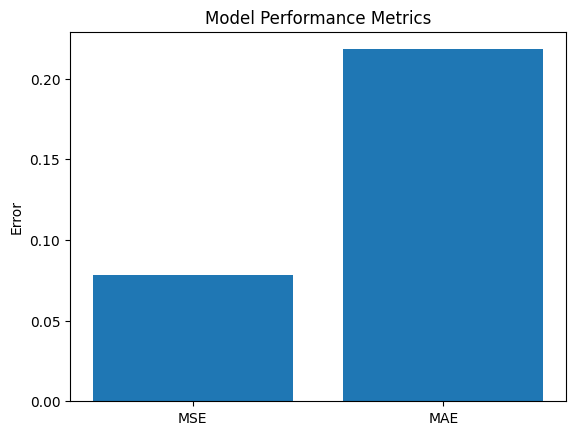

In [21]:
# Plot metrics as a bar chart
import matplotlib.pyplot as plt

metrics = {'MSE': mse, 'MAE': mae}
plt.bar(metrics.keys(), metrics.values())
plt.title('Model Performance Metrics')
plt.ylabel('Error')
plt.show()



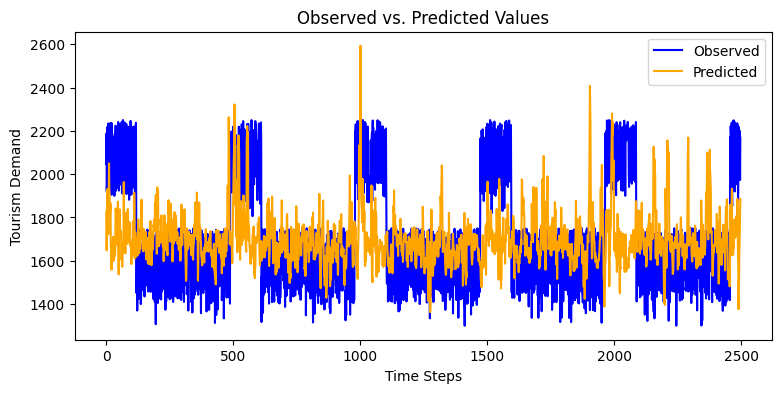

In [22]:
# Inverse transform the scaled data to original scale
y_test_original = scaler_target.inverse_transform(y_test.reshape(-1, 1))
y_pred_original = scaler_target.inverse_transform(y_pred)

# Plot observed vs. predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 4))
plt.plot(y_test_original, label='Observed', color='blue')
plt.plot(y_pred_original, label='Predicted', color='orange')
plt.title('Observed vs. Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Tourism Demand')
plt.legend()
plt.show()


In [23]:
# Forecast next 3 months
last_sequence = data[-time_steps:, :-1]  # Last observed sequence
predictions = []
for _ in range(3):
    pred_scaled = lstm_attention_model.predict(last_sequence[np.newaxis, :, :])
    pred_original = scaler_target.inverse_transform(pred_scaled)
    predictions.append(pred_original[0, 0])

    # Update last_sequence with the new prediction
    last_sequence = np.roll(last_sequence, shift=-1, axis=0)
    last_sequence[-1, -1] = pred_scaled[0, 0]

print("Forecast for the next 3 months:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Forecast for the next 3 months: [1951.0992, 2029.6731, 1932.7566]


In [24]:
import joblib
import tensorflow as tf
from tensorflow.keras.models import load_model

In [25]:
# Save the model
model_save_path = "lstm_attention_model.keras"
lstm_attention_model.save(model_save_path, save_format="keras_v3")
print("Model saved successfully.")

Model saved successfully.


In [26]:
# Save the scalers
scaler_features_save_path = "scaler_features.pkl"
scaler_target_save_path = "scaler_target.pkl"
joblib.dump(scaler_features, scaler_features_save_path)
joblib.dump(scaler_target, scaler_target_save_path)
print("Scalers saved successfully.")

Scalers saved successfully.


In [27]:
# Load the model with the custom layer
from tensorflow.keras.models import load_model

model_save_path = "lstm_attention_model.keras"
loaded_model = load_model(model_save_path, custom_objects={"AttentionLayer": AttentionLayer})
print("Model loaded successfully.")

# Load scalers
scaler_features = joblib.load(scaler_features_save_path)
scaler_target = joblib.load(scaler_target_save_path)
print("Scalers loaded successfully.")

# Verify loaded model functionality
print(loaded_model.summary())

Model loaded successfully.
Scalers loaded successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'attention_layer', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 12, 4)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 12, 50)              │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_layer (AttentionLayer)     │ (None, 50)                  │              51 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,308 (130.11 KB)

 Trainable params: 11,102 (43.37 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,206 (86.75 KB)

None


In [28]:
# Forecast function
def forecast_future_values(model, recent_data, scaler, steps_ahead=3):
    predictions = []
    current_input = recent_data

    for _ in range(steps_ahead):
        # Predict the next value
        next_value_scaled = model.predict(current_input[np.newaxis, :, :])[0, 0]
        predictions.append(next_value_scaled)

        # Update the input: Shift the sequence and add the new prediction
        current_input = np.roll(current_input, shift=-1, axis=0)
        current_input[-1, -1] = next_value_scaled

    # Transform predictions back to original scale
    predictions_original_scale = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
    return predictions_original_scale


In [29]:
# @title
# Use the last sequence from the dataset for forecasting
recent_data = data[-time_steps:, :-1]  # Last observed sequence
future_predictions = forecast_future_values(loaded_model, recent_data, scaler_target, steps_ahead=20)

print("Future Predictions:", future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Future Predictions: [1951.0992 2029.6731 1932.7566 1681.1572 1609.9789 1592.1346 1611.6791
 1648.9248 1723.4353 1735.6523 1809.9236 1784.4584 1796.4962 1723.2509
 1734.0385 1826.2222 1720.221  1616.3291 1584.5492 1667.5375]
